In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [18]:
'''# Daten laden und aufteilen
data = pd.read_csv('concrete.csv')
sample = data.sample(n=500, random_state=76344) # Vorheriger Datensatz war zu gut, daher nehmen wir nur 500 Zeilen um DataAugmentation testen zu können

df_train, df_test = train_test_split(sample, test_size=0.2, random_state=42)

df_train.to_csv('train.csv', index=False)
df_test.to_csv('test.csv', index=False)'''

"# Daten laden und aufteilen\ndata = pd.read_csv('concrete.csv')\nsample = data.sample(n=500, random_state=76344) # Vorheriger Datensatz war zu gut, daher nehmen wir nur 500 Zeilen um DataAugmentation testen zu können\n\ndf_train, df_test = train_test_split(sample, test_size=0.2, random_state=42)\n\ndf_train.to_csv('train.csv', index=False)\ndf_test.to_csv('test.csv', index=False)"

In [19]:
df_train = pd.read_csv('train.csv') # Wenn man Augemented Daten verwendet kann man das hier reinladen
df_test = pd.read_csv('test.csv')

X_train = df_train.drop(columns=['strength'])
y_train = df_train['strength']

X_test = df_test.drop(columns=['strength'])
y_test = df_test['strength']

In [20]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=76344)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 35.24971882022223
R²: 0.849304522983098


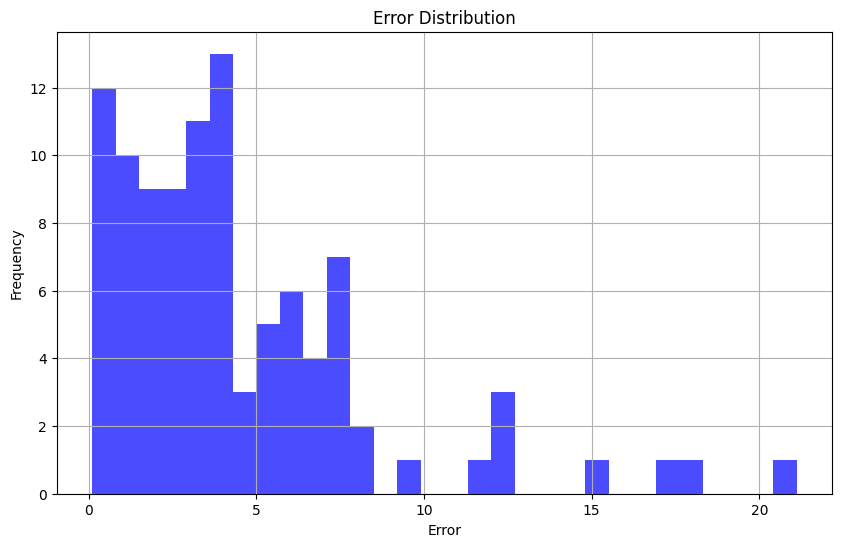

In [21]:
errors = np.abs(y_test - y_pred)

plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, alpha=0.7, color='blue')
plt.title('Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [22]:
model.feature_importances_

array([0.33366382, 0.08470158, 0.02098138, 0.10919928, 0.06468728,
       0.03175268, 0.0551683 , 0.29984569])

In [23]:
X_test

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,238.0,0.0,0.0,186.0,0.0,1119.0,789.0,7
1,318.0,0.0,126.0,210.0,6.0,861.0,737.0,28
2,251.8,0.0,99.9,146.1,12.4,1006.0,899.8,14
3,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,3
4,266.0,112.0,87.0,178.0,10.0,910.0,745.0,28
...,...,...,...,...,...,...,...,...
95,250.0,0.0,0.0,182.0,0.0,1100.0,820.0,28
96,194.7,0.0,100.5,165.6,7.5,1006.4,905.9,28
97,160.0,188.0,146.0,203.0,11.0,829.0,710.0,28
98,277.1,0.0,97.4,160.6,11.8,973.9,875.6,56


In [24]:
test = [224.92482, 70.61229, 71.09925, 185.87529, 4.91794, 985.2465, 803.50586, 41.930157]

In [25]:
model.predict([test])

array([59.7041])